<a href="https://colab.research.google.com/github/XinminChuUMB/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

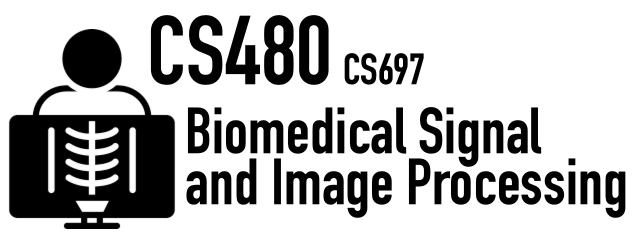
#Assignment 5

Xinmin Chu

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 27.6 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [3]:
# TODO: YOUR_ANSWER: 220 slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

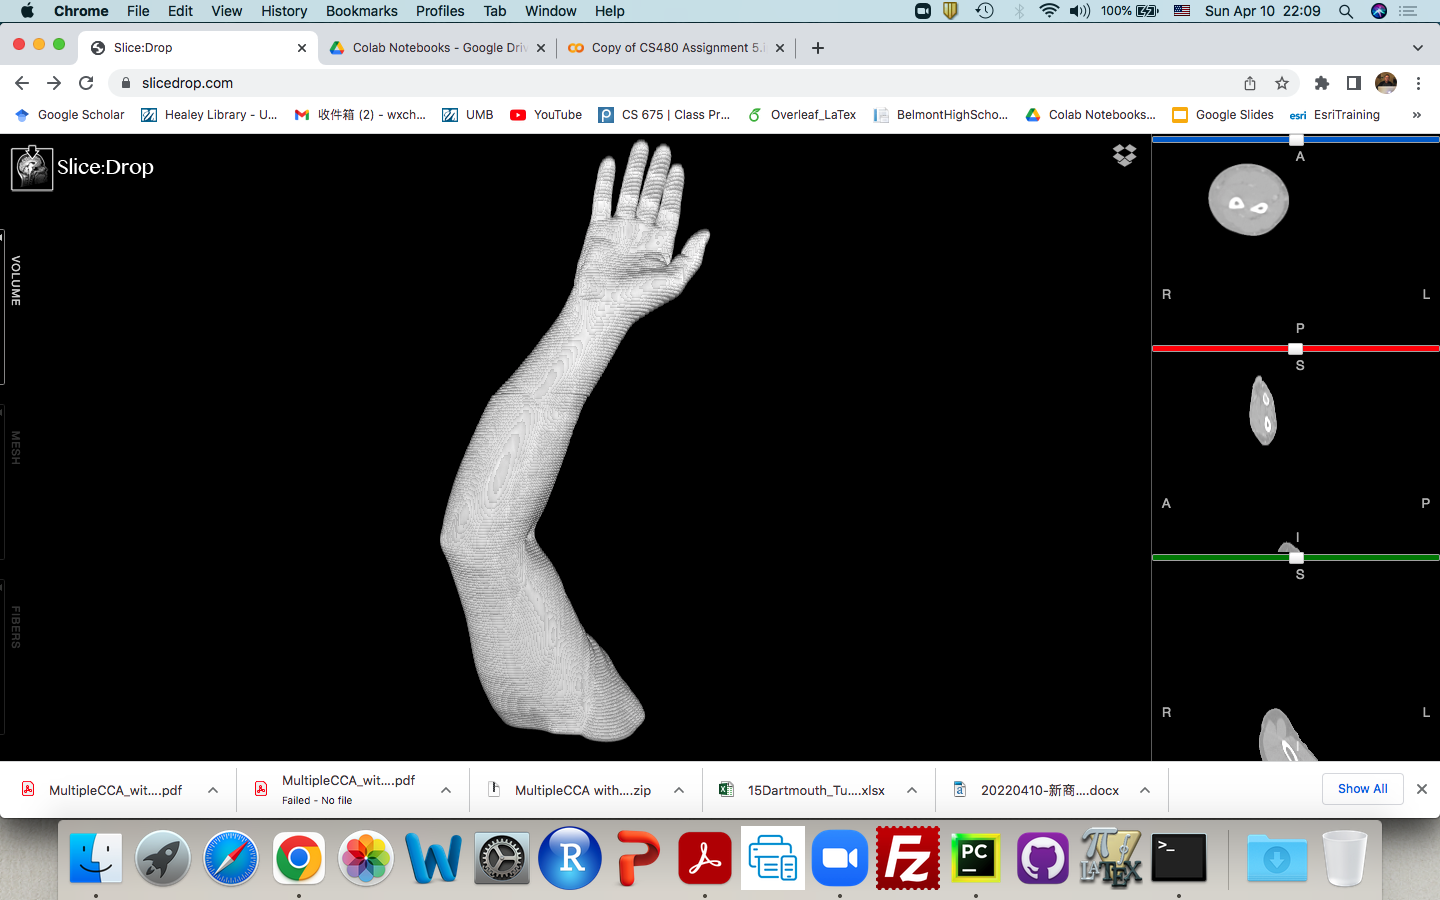

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [4]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [5]:
from pydicom import dcmread

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [6]:
import os

In [7]:
ctfiles = sorted(os.listdir('ct'))

In [8]:
len(ctfiles)

220

In [9]:
print(ctfiles)

['IM-0001-0001.dcm', 'IM-0001-0002.dcm', 'IM-0001-0003.dcm', 'IM-0001-0004.dcm', 'IM-0001-0005.dcm', 'IM-0001-0006.dcm', 'IM-0001-0007.dcm', 'IM-0001-0008.dcm', 'IM-0001-0009.dcm', 'IM-0001-0010.dcm', 'IM-0001-0011.dcm', 'IM-0001-0012.dcm', 'IM-0001-0013.dcm', 'IM-0001-0014.dcm', 'IM-0001-0015.dcm', 'IM-0001-0016.dcm', 'IM-0001-0017.dcm', 'IM-0001-0018.dcm', 'IM-0001-0019.dcm', 'IM-0001-0020.dcm', 'IM-0001-0021.dcm', 'IM-0001-0022.dcm', 'IM-0001-0023.dcm', 'IM-0001-0024.dcm', 'IM-0001-0025.dcm', 'IM-0001-0026.dcm', 'IM-0001-0027.dcm', 'IM-0001-0028.dcm', 'IM-0001-0029.dcm', 'IM-0001-0030.dcm', 'IM-0001-0031.dcm', 'IM-0001-0032.dcm', 'IM-0001-0033.dcm', 'IM-0001-0034.dcm', 'IM-0001-0035.dcm', 'IM-0001-0036.dcm', 'IM-0001-0037.dcm', 'IM-0001-0038.dcm', 'IM-0001-0039.dcm', 'IM-0001-0040.dcm', 'IM-0001-0041.dcm', 'IM-0001-0042.dcm', 'IM-0001-0043.dcm', 'IM-0001-0044.dcm', 'IM-0001-0045.dcm', 'IM-0001-0046.dcm', 'IM-0001-0047.dcm', 'IM-0001-0048.dcm', 'IM-0001-0049.dcm', 'IM-0001-0050.dcm',

In [10]:
# the first slice
dcm_file_0 = dcmread('ct/{}'.format(ctfiles[0]))

In [11]:
dcm_file_0.pixel_array.shape

(454, 512)

In [12]:
data_shape = list(dcm_file_0.pixel_array.shape)

In [13]:
data_shape.append(220)

In [14]:
data_shape

[454, 512, 220]

In [16]:
ct_3Dimg_data = np.zeros(data_shape)

In [17]:
for i, j in enumerate(ctfiles):
  ct_3Dimg_data[:,:,i] =  dcmread('ct/{}'.format(j)).pixel_array

In [20]:
ct_3Dimg_data.shape

(454, 512, 220)

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [ ]:
# pixel aspects, assuming all slices are the same
ps = dcm_file_0.PixelSpacing
ss = dcm_file_0.SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

In [ ]:
# TODO: YOUR CODE FOR AXIAL

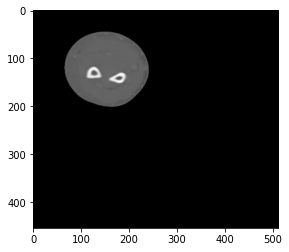

In [213]:
imshow(ct_3Dimg_data[:,:,data_shape[2]//2], cmap='gray')

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL

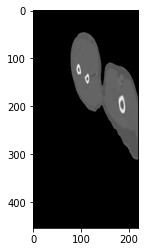

In [217]:
imshow(ct_3Dimg_data[:,data_shape[1]//3,:], cmap='gray')

In [ ]:
# TODO: YOUR CODE FOR CORONAL

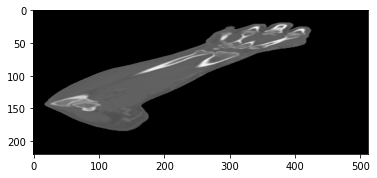

In [225]:
imshow(ct_3Dimg_data[data_shape[0]//4,:,:].T, cmap='gray')

Reference: https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [100]:
# TODO: YOUR CODE

In [117]:
dcm_file_0['WindowCenter'].value

'30.0'

In [121]:
dcm_file_0['WindowWidth'].value

'410.0'

In [118]:
dcm_file_0['RescaleIntercept'].value

'-1024.0'

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

AXIAL slices:

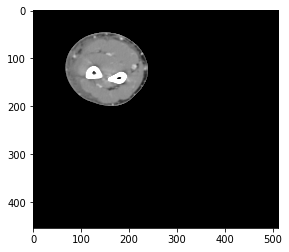

In [140]:
wdw = dcm_file_0.WindowWidth # width
lvl = dcm_file_0.WindowCenter # level
rsc = dcm_file_0.RescaleIntercept # rescale

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

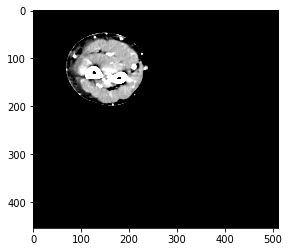

In [142]:
wdw = 80
lvl = 40

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

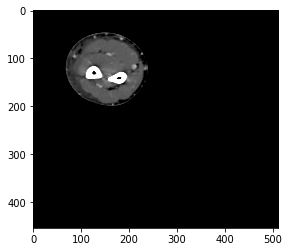

In [147]:
wdw = 300
lvl = 100

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

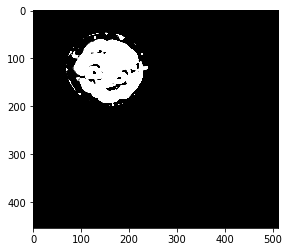

In [148]:
wdw = 8
lvl = 32

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

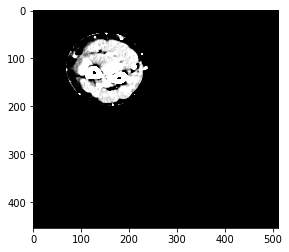

In [161]:
wdw = 40
lvl = 40

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

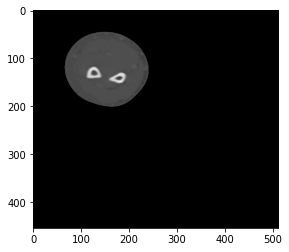

In [149]:
wdw = 2800
lvl = 600

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

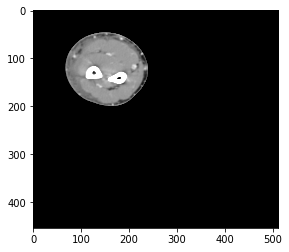

In [160]:
wdw = 350
lvl = 20

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

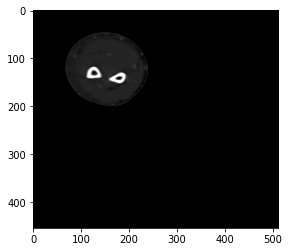

In [162]:
wdw = 1500
lvl = 600

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

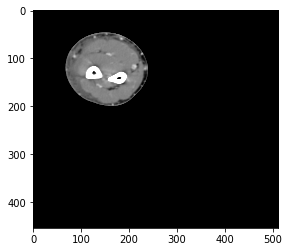

In [163]:
wdw = 350
lvl = 50

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

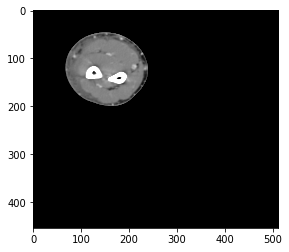

In [164]:
wdw = 400
lvl = 50

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

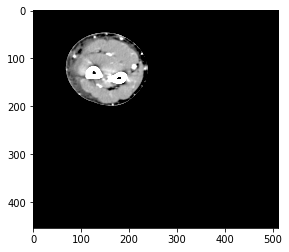

In [165]:
wdw = 150
lvl = 30

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

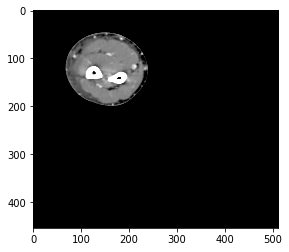

In [166]:
wdw = 250
lvl = 50

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

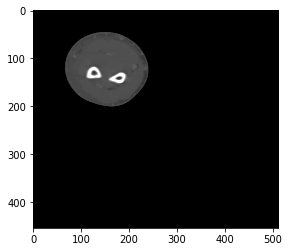

In [167]:
wdw = 1800
lvl = 400

imshow(ct_3Dimg_data[:,:,data_shape[2]//2] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

SAGITTAL slices:

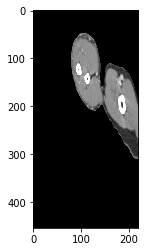

In [226]:
wdw = dcm_file_0.WindowWidth
lvl = dcm_file_0.WindowCenter

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

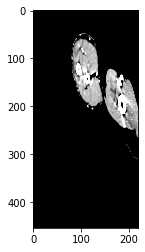

In [227]:
wdw = 80
lvl = 40

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

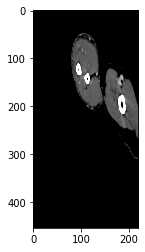

In [228]:
wdw = 300
lvl = 100

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

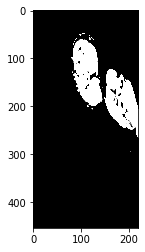

In [229]:
wdw = 8
lvl = 32

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

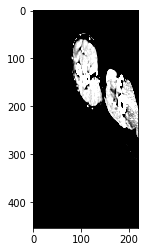

In [230]:
wdw = 40
lvl = 40

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

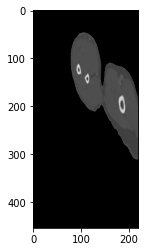

In [231]:
wdw = 2800
lvl = 600

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

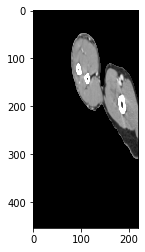

In [232]:
wdw = 350
lvl = 20

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

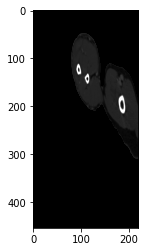

In [233]:
wdw = 1500
lvl = 600

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

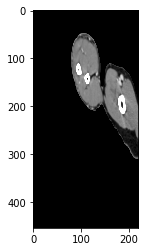

In [234]:
wdw = 350
lvl = 50

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

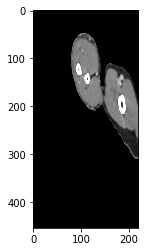

In [235]:
wdw = 400
lvl = 50

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

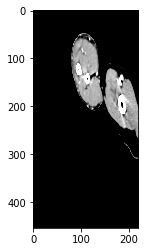

In [236]:
wdw = 150
lvl = 30

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

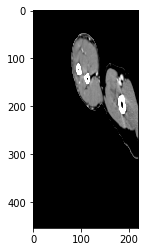

In [237]:
wdw = 250
lvl = 50

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

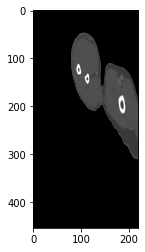

In [238]:
wdw = 1800
lvl = 400

imshow(ct_3Dimg_data[:,data_shape[1]//3,:] + rsc, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

CORONAL slices:

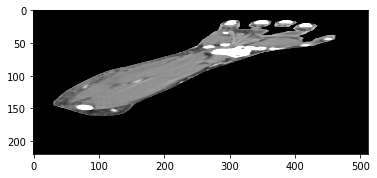

In [191]:
wdw = dcm_file_0.WindowWidth
lvl = dcm_file_0.WindowCenter

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

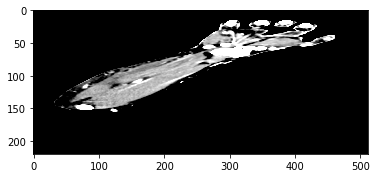

In [240]:
wdw = 80
lvl = 40

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

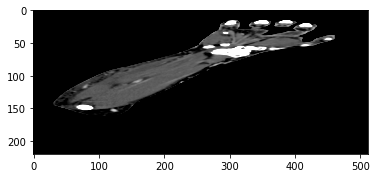

In [241]:
wdw = 300
lvl = 100

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

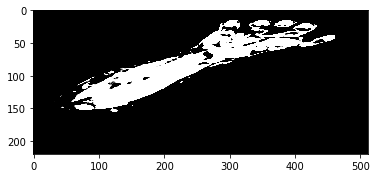

In [242]:
wdw = 8
lvl = 32

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

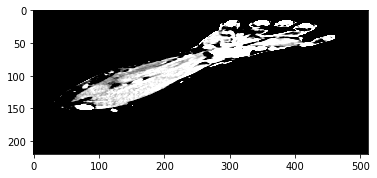

In [258]:
wdw = 40
lvl = 40

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

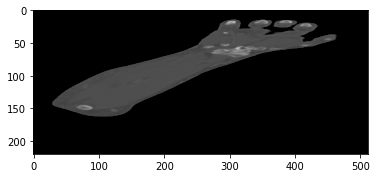

In [259]:
wdw = 2800
lvl = 600

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

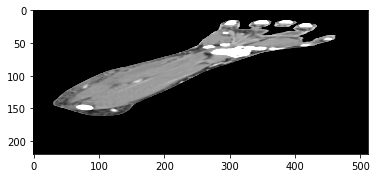

In [260]:
wdw = 350
lvl = 20

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

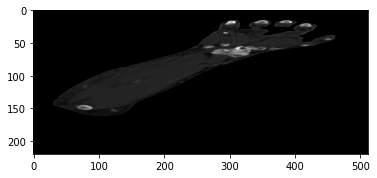

In [246]:
wdw = 1500
lvl = 600

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

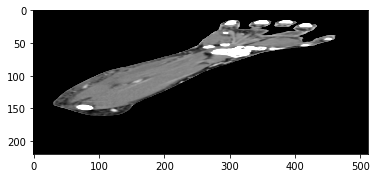

In [247]:
wdw = 350
lvl = 50

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

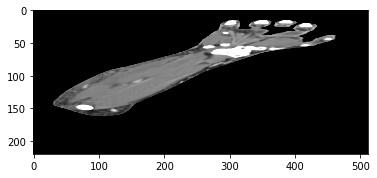

In [261]:
wdw = 400
lvl = 50

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

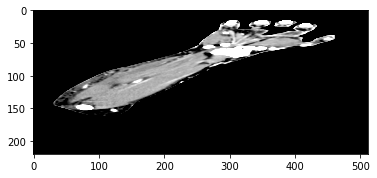

In [262]:
wdw = 150
lvl = 30

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

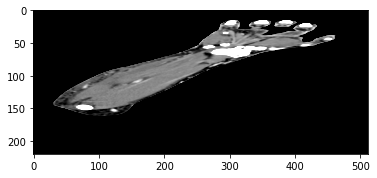

In [263]:
wdw = 250
lvl = 50

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

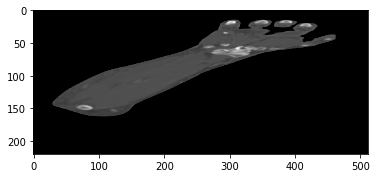

In [251]:
wdw = 1800
lvl = 400

imshow((ct_3Dimg_data[data_shape[0]//5,:,:] + rsc).T, cmap='gray', vmin=(lvl - wdw // 2), vmax=(lvl + wdw // 2))

In [168]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

Based on my trials, there is good visualization when width is 350 and level =20 or 30. It is close to the soft tissues of head and neck (w: 350-400, L: 20-60, as suggested by Hounsfield units). The reason is that there are bones and soft tissues in human hand and arm, similar to neck organization.

Reference: https://radiopaedia.org/articles/windowing-ct?lang=us

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [340]:
wdw = dcm_file_0.WindowWidth
lvl = dcm_file_0.WindowCenter

In [341]:
rsc

'-1024.0'

In [264]:
# TODO: YOUR CODE TO SEGMENT FAT

In [431]:
fat_mask = ct_3Dimg_data.copy()
fat_mask = fat_mask.astype(np.int16)
fat_mask[fat_mask > -60] = 0
fat_mask[fat_mask < -100] = 0

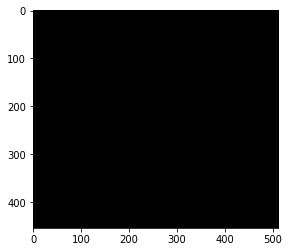

In [432]:
imshow(fat_mask[:,:,data_shape[2] // 2] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

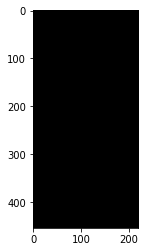

In [433]:
imshow(fat_mask[:,data_shape[1] // 3,:] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

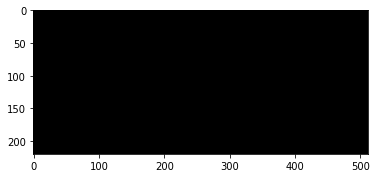

In [434]:
imshow(fat_mask[data_shape[0] // 5,:,:].T + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [422]:
soft_tissue_mask = ct_3Dimg_data.copy()
soft_tissue_mask = soft_tissue_mask.astype(np.int16)
soft_tissue_mask[soft_tissue_mask < 40] = 0
soft_tissue_mask[soft_tissue_mask > 80] = 0

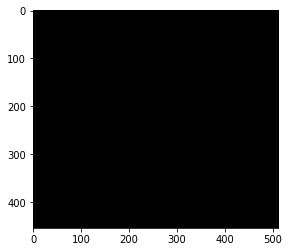

In [423]:
imshow(soft_tissue_mask[:,:,data_shape[2] // 2] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

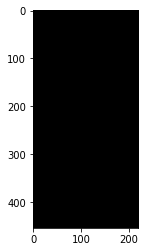

In [382]:
imshow(soft_tissue_mask[:, data_shape[1] // 3, :] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

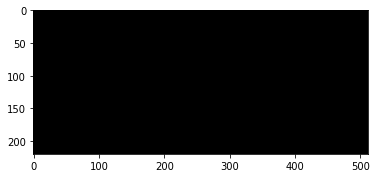

In [383]:
imshow(soft_tissue_mask[data_shape[0] // 5, :, :].T + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [424]:
# based on the boundaries on class slides: Bones +400 to + 1000
bones_mask = ct_3Dimg_data.copy()
bones_mask = bones_mask.astype(np.int16)
bones_mask[bones_mask < 400] = 0
bones_mask[bones_mask > 1000] = 0

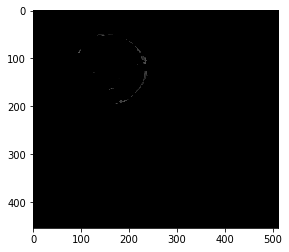

In [425]:
imshow(bones_mask[:,:,data_shape[2] // 2] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

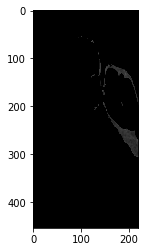

In [426]:
imshow(bones_mask[:, data_shape[1] // 3, :] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

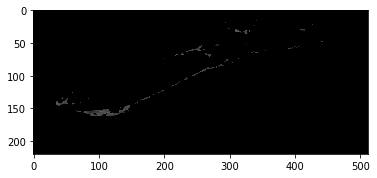

In [427]:
imshow((bones_mask[data_shape[0] // 5, :, :] + rsc).T, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

In [428]:
# based on the boundaries : +700 to + 3000
bones_mask = ct_3Dimg_data.copy()
bones_mask = bones_mask.astype(np.int16)
bones_mask[bones_mask < 600] = 0
bones_mask[bones_mask > 3600] = 0

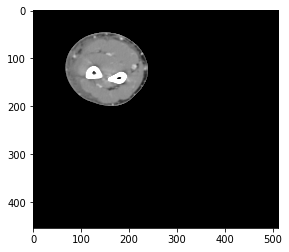

In [419]:
imshow(bones_mask[:,:,data_shape[2] // 2] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

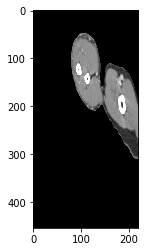

In [429]:
imshow(bones_mask[:, data_shape[1] // 3, :] + rsc, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

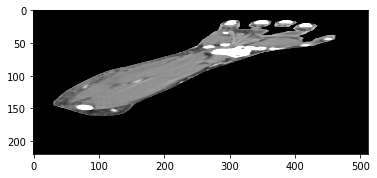

In [430]:
imshow((bones_mask[data_shape[0] // 5, :, :] + rsc).T, cmap='gray', vmin = (lvl - wdw // 2), vmax = (lvl + wdw // 2))

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

Based on my trials with the HU on Professor Haehn's lecture slides, the bones segmentation has a little contours of bones, but fat and soft tissues segmentations are only dark. 

If change the boundaries to +600 to +3600, the segmentation is shown.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""